In [1]:
import pyomo.environ as pyo

In [2]:
import numpy as np
import pandas as pd


In [4]:
data = pd.read_csv("DebrisFlow.txt",sep ='\t',header = None)

In [94]:
model = pyo.ConcreteModel()

In [95]:
M = [max( abs(data.iloc[i][1] - 0.29*data.iloc[i][0]-25) , abs(data.iloc[i][1] - 0.29*data.iloc[i][0]+94),
        abs(data.iloc[i][1]-25) , abs(data.iloc[i][1] +94)) for i in range(len(data))]

In [96]:
I = np.arange(len(data)) +1

In [97]:
model.Iset = pyo.Set(initialize=I)

In [98]:
def rule_x(model,i):
    return data.iloc[i-1][0]
def rule_y(model,i):
    return data.iloc[i-1][1]

In [99]:
B = np.arange(4)+1

In [100]:
model.B = pyo.Set(initialize=B)

In [101]:
model.X = pyo.Param(model.Iset,initialize=rule_x)

In [102]:
model.Y = pyo.Param(model.Iset,initialize=rule_y)

In [103]:
model.c = pyo.Var(model.B,domain=pyo.Reals,bounds=(0,0.3))

In [104]:
model.d = pyo.Var(model.B,domain=pyo.Reals,bounds=(-94,25))

In [105]:
model.eps = pyo.Var(model.B,domain = pyo.NonNegativeReals)

In [106]:
model.delta = pyo.Var(model.Iset,model.B,domain = pyo.Binary)

In [107]:
def M_rule(model,i):
    return M[i-1]

In [108]:
model.M = pyo.Param(model.Iset,initialize=M_rule)

In [109]:
def rule_const1(model,i,b):
    return model.Y[i] - model.c[b]*model.X[i] - model.d[b] <= model.eps[b] + model.M[i]*(1-model.delta[i,b])

In [110]:
model.const1 = pyo.Constraint(model.Iset,model.B,rule = rule_const1)

In [111]:
def rule_const2(model,i,b):
    return -1*model.Y[i] + model.c[b]*model.X[i] + model.d[b] <= model.eps[b] + model.M[i]*(1-model.delta[i,b])

In [112]:
model.const2 = pyo.Constraint(model.Iset,model.B,rule=rule_const2)

In [113]:
def rule_const3(model,i):
    return sum(model.delta[i,b] for b in model.B) == 1

In [114]:
model.const3 = pyo.Constraint(model.Iset,rule=rule_const3)

In [115]:
def rule_obj(model):
    return sum(model.eps[b] for b in model.B) 

In [116]:
model.obj = pyo.Objective(rule=rule_obj,sense = pyo.minimize)

In [117]:
solver = pyo.SolverFactory('glpk')

In [118]:
opt = {'tmlim':600}

In [119]:
result = solver.solve(model, options = opt)

In [120]:
c = [pyo.value(model.c[i]) for i in model.B]

In [121]:
d =[pyo.value(model.d[i]) for i in model.B]

In [122]:
print(c)

[0.0966992965581255, 0.105572017552667, 0.0583895489342707, 0.0198148693543589]


In [123]:
print(d)

[-12.2943332819541, -12.9769372832477, 6.49699201595916, 2.69606750649058]


In [124]:
import matplotlib.pyplot as plt


In [125]:
lines = [[cc,dd] for cc,dd in zip(c,d)]

In [126]:
lines

[[0.0966992965581255, -12.2943332819541],
 [0.105572017552667, -12.9769372832477],
 [0.0583895489342707, 6.49699201595916],
 [0.0198148693543589, 2.69606750649058]]

In [127]:
cls = []
for i in range(1,len(data)+1):
    for j in range(1,len(B)+1):
        if pyo.value(model.delta[i,j])==1:
            cls.append(j)
    

In [128]:
c_map={1:'blue',2:'orange',3:'green',4:'red'}
colors =[c_map[i] for i in cls]

# 4 clusters

In [129]:
print(result)


Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 397
  Number of variables: 189
  Number of nonzeros: 1585
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: feasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 600.5564365386963
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



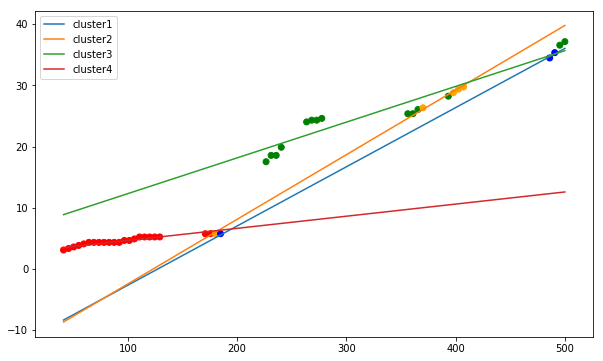

In [130]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  
plt.scatter(data[0],data[1],c=colors)


plt.show()


# 3 clusters

In [31]:
print(result)


Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 309
  Number of variables: 142
  Number of nonzeros: 1189
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: feasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 600.5654335021973
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



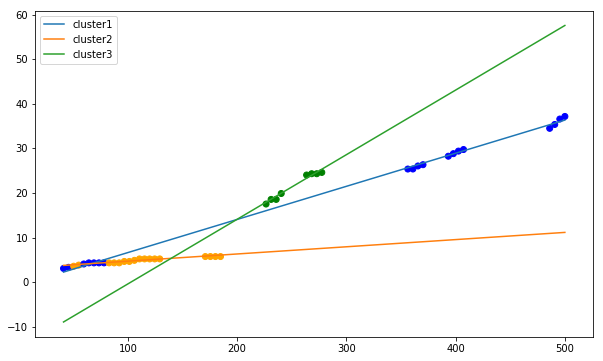

In [53]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  
plt.scatter(data[0],data[1],c=colors)


plt.show()


# 2 clusters

In [92]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 2.59703828635753
  Upper bound: 2.59703828635753
  Number of objectives: 1
  Number of constraints: 221
  Number of variables: 95
  Number of nonzeros: 793
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 429
      Number of created subproblems: 429
  Error rc: 0
  Time: 1.1112804412841797
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



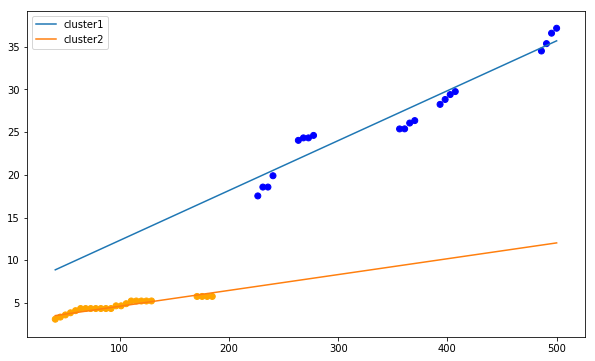

In [93]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  
plt.scatter(data[0],data[1],c=colors)


plt.show()
